In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
from tkinter import Tk, Label, Entry, Button
from tkinter import ttk
import nltk
from nltk.corpus import stopwords
import string

In [2]:
nltk.download('stopwords')

# Step 1: Read the data
data = pd.read_csv('News.csv')
# Filter
data = data.dropna(subset=['body'])  # Drop rows with null 'body' values
data = data[data['body'] != '']  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
# Step 2: Preprocess the text data
# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase and tokenize
    tokens = text.lower().split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Rejoin tokens into a single string
    return ' '.join(tokens)

data['processed_body'] = data['body'].apply(preprocess_text)

In [4]:
# Step 3: Vectorize the text
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['processed_body'])

In [5]:
# Step 4: Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

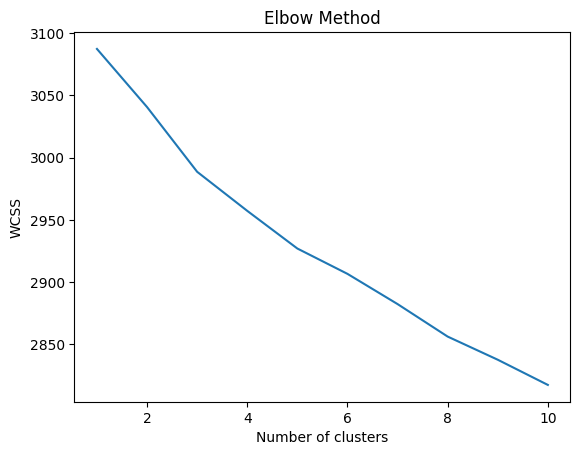

In [6]:
# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Step 5: Perform clustering
num_clusters = 3  # Adjust based on the elbow method result
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

In [8]:
# Step 6: Compute clustering performance metrics
silhouette_avg = silhouette_score(tfidf_matrix, clusters)
print("Silhouette Score:", silhouette_avg)

db_index = davies_bouldin_score(tfidf_matrix.toarray(), clusters)
print("Davies–Bouldin Index:", db_index)

Silhouette Score: 0.017123383181904112
Davies–Bouldin Index: 4.627009599855171


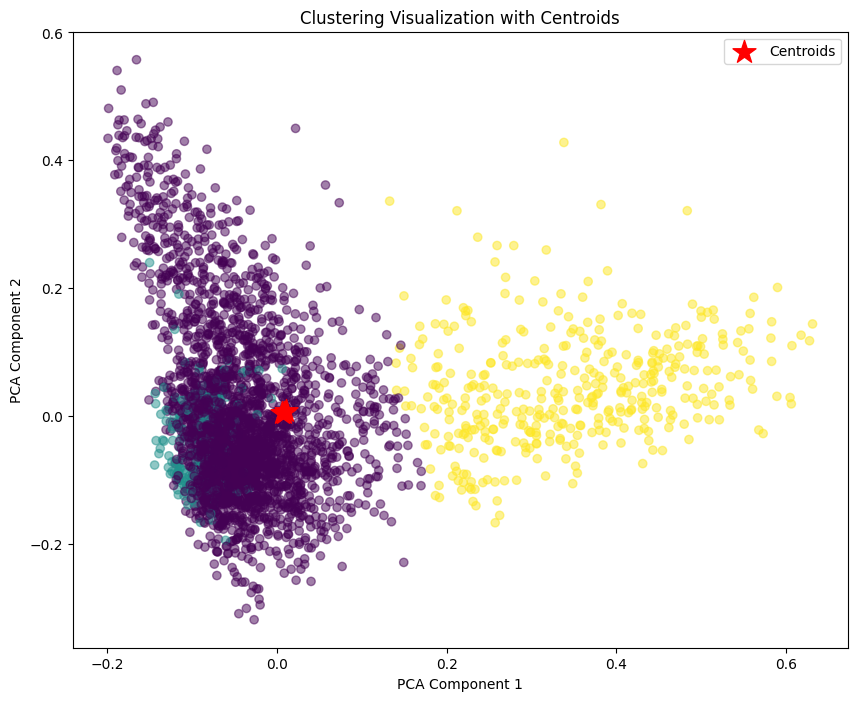

In [9]:
# Step 7: Visualize the clusters and centroids
pca = PCA(n_components=2).fit(tfidf_matrix.toarray())
data2D = pca.transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(data2D[:, 0], data2D[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=300, label='Centroids')
plt.title('Clustering Visualization with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

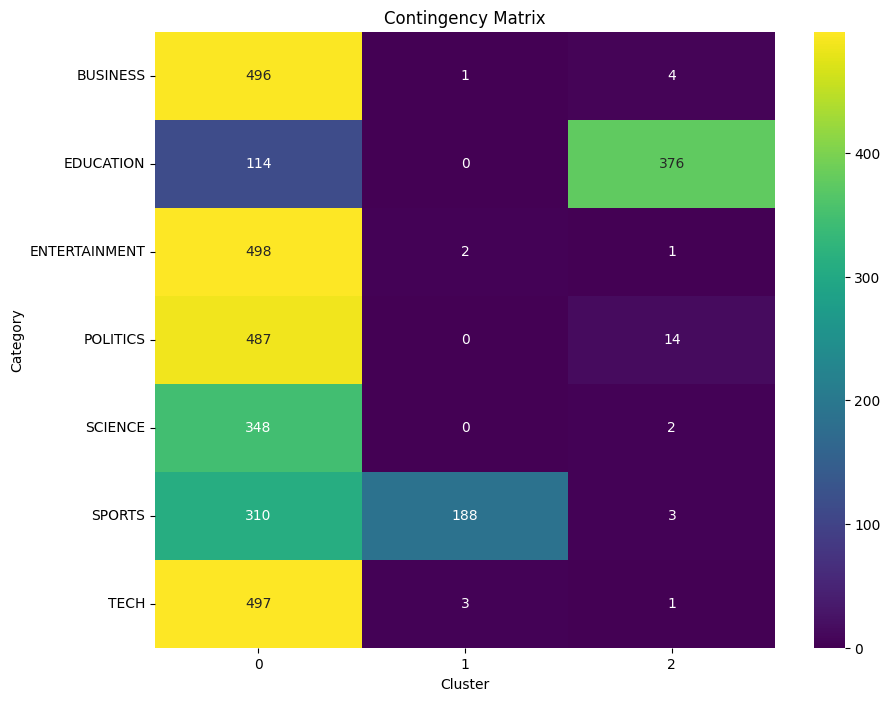

In [10]:
# Step 8: Compute and plot the contingency matrix
contingency_matrix = pd.crosstab(data['category'], clusters, rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Contingency Matrix')
plt.xlabel('Cluster')
plt.ylabel('Category')
plt.show()

In [ ]:

# Step 9: Build a GUI for user input
def get_cluster():
    user_input = entry.get()
    vectorized_input = tfidf_vectorizer.transform([preprocess_text(user_input)])
    cluster = kmeans.predict(vectorized_input)
    result_label.config(text=f"The input belongs to Cluster {cluster[0]}.")

root = Tk()
root.title("Text Cluster GUI")
root.minsize(600, 400)  # Set the minimum size of the window

instruction_label = ttk.Label(root, text="Enter a sentence or document:")
instruction_label.pack()

entry = ttk.Entry(root, width=50)
entry.pack()

submit_button = ttk.Button(root, text="Submit", command=get_cluster)
submit_button.pack()

result_label = ttk.Label(root, text="")
result_label.pack()

root.mainloop()
